# Исследование надёжности заёмщиков

Кредитный отдел банка запросил исследовать, какие факторы влияют на надёжность заёмщика. Необходимо предоставить портрет надёжного заемщика.

In [1]:
import pandas as pd
from nltk.stem import SnowballStemmer
from IPython.display import Image, display

In [2]:
clients_data = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP1\\data.csv')

In [3]:
clients_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


На первый вздгляд данные собраны качественно, за исключением кол-ва дней трудового стажа (отрицательные значения). В колонке "образование" данные можно привести к нижнему регистру - получим однотипные данные. В id образования 0 используется для высшего, 1 для среднего. В id семейного положения 0 для женат/замужем, 1 для гражданского брака. Цели кредита можно поделить на 4 категории: жьлье, авто, образование и свадьба. Наверняка появится что-то еще, если % таких целей будет низок, можно будет добавить категорию "прочее". Типы данных тоже приведены корректно для всех столбцов. Пропущены данные в столбцах days_employed и total_income. Предполагаю, что данные незаполнены в связи с отсутствием информации о трудовом стаже и о заработке, скорее всего случайные, понятнее станет после более глубокого изучения данных.

## Предобработка данных

### Заполняю пропущенные значения

In [5]:
empty_lines = clients_data[clients_data['days_employed'].isna() == True]
display(empty_lines.head(5))
print('Подсчёт значений:')
display(empty_lines.count())
display(f'Кол-во пропущенных значений в days_employed и total_income {21525 - 19351}') 
display(empty_lines['days_employed'].unique(), empty_lines['total_income'].unique()) 
print('Подсчёт по типу дохода:')
display(empty_lines['income_type'].value_counts())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Подсчёт значений:


children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

'Кол-во пропущенных значений в days_employed и total_income 2174'

array([nan])

array([nan])

Подсчёт по типу дохода:


сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Исходя из data.info() (Шаг 1) пропущенные данные присутствуют в колонках days_employed и total_income. Произведена проверка, что все незаполненные данные найдены и во всех строках где незаполнены days_employed, также незаполнена total_income. Предполагаю, что данные незаполнены в связи с отсутствием информации о трудовом стаже и о заработке. Во всех 2174 ячейках, где пропущены days_employed также пропущены и total_income. Сходства по income_type обнаружено не было, поэтому склонен считать, что пропуски полностью случайные. Пока непонятно как заполнить пропущенные значения в столбце days_employed в связи с тем, что большинство данных отрицательные. Попробую найти взаимосвязь.

In [6]:
above_zero_days_employed = clients_data[clients_data['days_employed'] > 0]
display(above_zero_days_employed.head(5))
display(above_zero_days_employed['income_type'].unique())
display(above_zero_days_employed['income_type'].value_counts())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью


array(['пенсионер', 'безработный'], dtype=object)

пенсионер      3443
безработный       2
Name: income_type, dtype: int64

In [7]:
def is_imployment_period_possible(row):
    years_employed = row['years_employed']
    years_employed_realistic = row['years_employed_realistic']
    if years_employed < 0:
        years_employed = years_employed * (-1)
    if years_employed_realistic > years_employed:
        return 'possible'
    else:
        return 'impossible'

clients_data['years_employed'] = clients_data['days_employed'] / 365.25
clients_data['years_employed_realistic'] = clients_data['dob_years'] - 18
clients_data['years_employed_possibility'] = clients_data.apply(is_imployment_period_possible, axis = 1)
display(clients_data.head(5))
display(clients_data['years_employed_possibility'].value_counts())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,years_employed_realistic,years_employed_possibility
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,-23.101090,24,possible
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,-11.019312,18,possible
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,-15.396092,15,impossible
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,-11.292942,14,possible
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,931.597733,35,impossible


possible      15427
impossible     6098
Name: years_employed_possibility, dtype: int64

Для наглядности трудовой стаж перевел в года и добавил в колонку years_employed. Затем исходя из возвраста клиента посчитал максимально возможный стаж. Максимально возможный стаж = кол-во лет клиента - 18; 18 так как по трудовому законодательству работать можно с 18ти лет. Сохранил эти данные в колонку years_employed_realistic. Если данные о стаже работы из таблицы превышают максимально возможный стаж работы, то считаю данные некорректными, в ином случае корректными (возможными). Сравнение провожу через функцию def is_imployment_period_possible(row), и данные записываю в колонку years_employed_possibility. На выходе получаю, что 28% данных о трудовом стаже невозможны, даже если считать что "-" перед количеством дней техническая ошибка. Так как вопросов к правильности данных в колонке days_employed очень много, уточнить у заказчика эту информацию нет возможности и вообще эта колонка не будет влиять на результаты исследования по поставленной задаче, выбираю NaN ни на что не менять  и пропусть замену по этой колонке.

In [8]:
data_grouped_income = clients_data.groupby('income_type')['total_income'].median()
display(data_grouped_income)
ttl_income_by_income_type_dict = data_grouped_income.to_dict()

def get_median_income_by_income_type(row):
    income_type = row['income_type']
    return int(ttl_income_by_income_type_dict[income_type])

clients_data['median_income'] = clients_data.apply(get_median_income_by_income_type, axis = 1)
clients_data['total_income'] = clients_data['total_income'].fillna(clients_data['median_income'])
clients_data.info()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   children                    21525 non-null  int64  
 1   days_employed               19351 non-null  float64
 2   dob_years                   21525 non-null  int64  
 3   education                   21525 non-null  object 
 4   education_id                21525 non-null  int64  
 5   family_status               21525 non-null  object 
 6   family_status_id            21525 non-null  int64  
 7   gender                      21525 non-null  object 
 8   income_type                 21525 non-null  object 
 9   debt                        21525 non-null  int64  
 10  total_income                21525 non-null  float64
 11  purpose                     21525 non-null  object 
 12  years_employed              19351 non-null  float64
 13  years_employed_realistic    215

Были обнаружены по 2174 пропущенных значений в колонках days_employed и total_income. Причем эти строки совпадают, то есть в строках, где пропущены days_employed также пропущена графа total_income.

Предполагаю, что данные незаполнены в связи с отсутствием информации о трудовом стаже и о заработке. Сходства по income_type в пропущенных данных обнаружено не было, поэтому склонен считать, что пропуски полностью случайные. 

days_employed:

В связи с тем, что вопросов к правильности данных в колонке days_employed: очень много, уточнить у заказчика эту информацию нет возможности и колонка не будет влиять на результаты исследования по поставленной задаче, значения не менялись. В ином случае для каждого возвраста можно было бы найти среднее значение трудового стажа и заполнить пустые данные этими данными.

total_income:

Для заполнения total_income я выбрал способ заполнения по медианным значениям. Так как они сильно разнятся в зависимости от income_type, я собрал медианные значения для всех income_type и преобразовал в словарь. Далее все пропущенные total_income заполнил медианными значениями, в зависимости от того, в какую категорию income_type попадает клиент. Правильнее было бы еще внутри групп income_type привязать total_income к трудовому стажу, но в виду "странности" данных по трудовому стажу, этого делать не стал.


### Заменяю вещественные значения на целочисленные

In [9]:
clients_data['days_employed'] = clients_data['days_employed'].fillna(0)
clients_data['days_employed'] = clients_data['days_employed'].astype('int64')
clients_data['total_income'] = clients_data['total_income'].astype('int64')
clients_data['years_employed'] = clients_data['years_employed'].fillna(0)
clients_data['years_employed'] = clients_data['years_employed'].astype('int64')
clients_data.info()
clients_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   children                    21525 non-null  int64 
 1   days_employed               21525 non-null  int64 
 2   dob_years                   21525 non-null  int64 
 3   education                   21525 non-null  object
 4   education_id                21525 non-null  int64 
 5   family_status               21525 non-null  object
 6   family_status_id            21525 non-null  int64 
 7   gender                      21525 non-null  object
 8   income_type                 21525 non-null  object
 9   debt                        21525 non-null  int64 
 10  total_income                21525 non-null  int64 
 11  purpose                     21525 non-null  object
 12  years_employed              21525 non-null  int64 
 13  years_employed_realistic    21525 non-null  in

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,years_employed_realistic,years_employed_possibility,median_income
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,-23,24,possible,142594
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,-11,18,possible,142594
2,0,-5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,-15,15,impossible,142594
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,-11,14,possible,142594
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,931,35,impossible,118514


### Работа с дубликатами

In [10]:
clients_data['education'].unique(), clients_data['family_status'].unique(), clients_data['income_type'].unique(), clients_data['gender'].unique()

(array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
        'неоконченное высшее', 'начальное', 'Высшее',
        'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
        'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
       dtype=object),
 array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
        'в разводе', 'Не женат / не замужем'], dtype=object),
 array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
        'безработный', 'предприниматель', 'студент', 'в декрете'],
       dtype=object),
 array(['F', 'M', 'XNA'], dtype=object))

In [11]:
clients_data['education'] = clients_data['education'].str.lower()
clients_data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [12]:
clients_data_duplicates = clients_data[clients_data.duplicated() == True]
clients_data_duplicates.sort_values('dob_years')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,years_employed_realistic,years_employed_possibility,median_income
20297,1,0,23,среднее,1,гражданский брак,1,F,сотрудник,0,142594,сыграть свадьбу,0,5,impossible,142594
19321,0,0,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,142594,сделка с подержанным автомобилем,0,5,impossible,142594
18328,0,0,29,высшее,0,женат / замужем,0,M,сотрудник,0,142594,покупка жилой недвижимости,0,11,impossible,142594
21281,1,0,30,высшее,0,женат / замужем,0,F,сотрудник,0,142594,покупка коммерческой недвижимости,0,12,impossible,142594
6312,0,0,30,среднее,1,женат / замужем,0,M,сотрудник,0,142594,строительство жилой недвижимости,0,12,impossible,142594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,0,0,64,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу,0,46,impossible,118514
20187,0,0,65,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу,0,47,impossible,118514
9528,0,0,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,118514,операции со своей недвижимостью,0,48,impossible,118514
9604,0,0,71,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы,0,53,impossible,118514


In [13]:
clients_data[(clients_data['dob_years'] == 23) & (clients_data['days_employed'] == 0) & (clients_data['purpose'] == 'сыграть свадьбу')].sort_values('dob_years')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,years_employed_realistic,years_employed_possibility,median_income
220,1,0,23,неоконченное высшее,2,гражданский брак,1,F,компаньон,0,172357,сыграть свадьбу,0,5,impossible,172357
8853,1,0,23,среднее,1,гражданский брак,1,F,сотрудник,0,142594,сыграть свадьбу,0,5,impossible,142594
20297,1,0,23,среднее,1,гражданский брак,1,F,сотрудник,0,142594,сыграть свадьбу,0,5,impossible,142594


In [14]:
display(clients_data.shape)
display(clients_data.duplicated().sum())
clients_data = clients_data.drop_duplicates().reset_index(drop = True)
display(clients_data.shape)

(21525, 16)

71

(21454, 16)

Первым шагом я произвел проверку на дубляж значений, связанных с регистром. В каждом из столбцов вывел уникальные значения и увидел что дубликаты есть только в колонке education, в связи с разным регистром написания образования. Замену произвел с помощью .str.lower()

Далее искал дубликаты методом .duplicated(), были найдены 71 дубликат, все удалены. 

Возможная причина возникновения луюликатов: клиенты несколько раз подавали заявки; сотрудники банка внесли анкеты несколько раз / сбой базы.

### Лемматизация

In [15]:
clients_data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [16]:
russian_stemmer = SnowballStemmer('russian')

In [17]:
def group_purpose_by_stem(row):
    purpose_group = row['purpose']
    if 'недвиж' in russian_stemmer.stem(purpose_group):
        return 'недвижимость'
    if 'жил' in russian_stemmer.stem(purpose_group):
        return 'недвижимость'
    elif 'авто' in russian_stemmer.stem(purpose_group):
        return 'автомобиль'
    elif 'образ' in russian_stemmer.stem(purpose_group):
        return 'образование'
    elif 'свад' in russian_stemmer.stem(purpose_group):
        return 'свадьба'
    else:
        return purpose_group

In [18]:
clients_data['purpose_grouped'] = clients_data.apply(group_purpose_by_stem, axis = 1)
display(clients_data['purpose_grouped'].unique())
display(clients_data.head(10))

array(['недвижимость', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,years_employed_realistic,years_employed_possibility,median_income,purpose_grouped
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,-23,24,possible,142594,недвижимость
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,-11,18,possible,142594,автомобиль
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,-15,15,impossible,142594,недвижимость
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,-11,14,possible,142594,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,931,35,impossible,118514,свадьба
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,-2,9,possible,172357,недвижимость
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,-7,25,possible,172357,недвижимость
7,0,-152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0,32,possible,142594,образование
8,2,-6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,-18,17,impossible,142594,свадьба
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,-5,23,possible,142594,недвижимость


### Категоризация данных

In [19]:
data_debt_all = clients_data.groupby('debt')['debt'].agg('count')
data_debt_all_perc = (data_debt_all[1] / data_debt_all.sum()) * 100
display(data_debt_all)
display(data_debt_all_perc)

debt
0    19713
1     1741
Name: debt, dtype: int64

8.115036822970076

In [20]:
def group_by_children_quantity(row):
    children = row['children']
    if children <= 0:
        return '0'
    elif children == 1:
        return '1'
    else:
        return '2+'

clients_data['children_grouped'] = clients_data.apply(group_by_children_quantity, axis = 1)
#display(data.head(5))
grouped_by_children = clients_data.groupby('children_grouped')['debt'].agg(['count', 'sum'])
grouped_by_children['%'] = (grouped_by_children['sum'] / grouped_by_children['count']) * 100
display(grouped_by_children.sort_values('%'))

,count,sum,%
children_grouped,,,
0,14138,1064,7.525817
1,4808,444,9.234609
2+,2508,233,9.290271


In [21]:
grouped_by_family_status = clients_data.groupby('family_status')['debt'].agg(['count', 'sum'])
grouped_by_family_status['%'] = (grouped_by_family_status['sum'] / grouped_by_family_status['count']) * 100
display(grouped_by_family_status.sort_values('%'))

,count,sum,%
family_status,,,
вдовец / вдова,959,63,6.569343
в разводе,1195,85,7.112971
женат / замужем,12339,931,7.545182
гражданский брак,4151,388,9.347145
Не женат / не замужем,2810,274,9.750890


In [22]:
def group_by_total_income(row):
    income = row['total_income']
    if income <= 0:
        return '0'
    elif 0 < income <= 100000:
        return '0 - 100000'
    elif 100000 < income <= 150000:
        return '100000 - 150000'
    elif 150000 < income <= 200000:
        return '150000 - 200000'
    else:
        return '200000+'

clients_data['total_income_grouped'] = clients_data.apply(group_by_total_income, axis = 1)
grouped_by_total_income = clients_data.groupby('total_income_grouped')['debt'].agg(['count', 'sum'])
grouped_by_total_income['%'] = (grouped_by_total_income['sum'] / grouped_by_total_income['count']) * 100
display(grouped_by_total_income.sort_values('%'))

,count,sum,%
total_income_grouped,,,
200000+,5067,358,7.065325
0 - 100000,4463,354,7.931884
150000 - 200000,4764,405,8.501259
100000 - 150000,7160,624,8.715084


In [23]:
grouped_by_purpose = clients_data.groupby('purpose_grouped')['debt'].agg(['count', 'sum'])
grouped_by_purpose['%'] = (grouped_by_purpose['sum'] / grouped_by_purpose['count']) * 100
display(grouped_by_purpose.sort_values('%'))

,count,sum,%
purpose_grouped,,,
недвижимость,10811,782,7.233373
свадьба,2324,186,8.003442
образование,4013,370,9.220035
автомобиль,4306,403,9.359034


In [24]:
grouped_by_gender = clients_data.groupby('gender')['debt'].agg(['count', 'sum'])
grouped_by_gender['%'] = (grouped_by_gender['sum'] / grouped_by_gender['count']) * 100
display(grouped_by_gender.sort_values('%'))

,count,sum,%
gender,,,
XNA,1,0,0.000000
F,14174,994,7.012840
M,7279,747,10.262399


In [25]:
grouped_by_education = clients_data.groupby('education')['debt'].agg(['count', 'sum'])
grouped_by_education['%'] = (grouped_by_education['sum'] / grouped_by_education['count']) * 100
display(grouped_by_education.sort_values('%'))

,count,sum,%
education,,,
ученая степень,6,0,0.000000
высшее,5250,278,5.295238
среднее,15172,1364,8.990245
неоконченное высшее,744,68,9.139785
начальное,282,31,10.992908


In [26]:
def group_by_age(row):
    age = row['dob_years']
    if age <= 30:
        return '18-30'
    elif 30 < age <= 40:
        return '30-40'
    elif 40 < age <= 45:
        return '40-45'
    elif 45 < age <= 50:
        return '45-50'
    elif 50 < age <= 55:
        return '50-55'
    else:
        return '55+'

clients_data['age_grouped'] = clients_data.apply(group_by_age, axis = 1)
#display(data.head(5))
grouped_by_age = clients_data.groupby('age_grouped')['debt'].agg(['count', 'sum'])
grouped_by_age['%'] = (grouped_by_age['sum'] / grouped_by_age['count']) * 100
display(grouped_by_age.sort_values('%'))

,count,sum,%
age_grouped,,,
55+,4336,240,5.535055
50-55,2308,141,6.109185
45-50,2506,187,7.462091
40-45,2754,216,7.843137
30-40,5732,546,9.525471
18-30,3818,411,10.764798


In [27]:
grouped_by_income_type = clients_data.groupby('income_type')['debt'].agg(['count', 'sum'])
grouped_by_income_type['%'] = (grouped_by_income_type['sum'] / grouped_by_income_type['count']) * 100
display(grouped_by_income_type.sort_values('%'))

,count,sum,%
income_type,,,
предприниматель,2,0,0.000000
студент,1,0,0.000000
пенсионер,3829,216,5.641160
госслужащий,1457,86,5.902539
компаньон,5078,376,7.404490
сотрудник,11084,1061,9.572357
безработный,2,1,50.000000
в декрете,1,1,100.000000


In [28]:
clients_data_pivot = clients_data.pivot_table(index = ['family_status', 'gender', 'education'], columns = 'debt', values = 'purpose', aggfunc = 'count')
clients_data_pivot['%'] = (clients_data_pivot[1] / clients_data_pivot[0]) * 100
clients_data_pivot.sort_values('%')

debt                                                   0      1          %
family_status         gender education                                    
Не женат / не замужем F      высшее                503.0   19.0   3.777336
вдовец / вдова        F      высшее                119.0    5.0   4.201681
в разводе             F      высшее                242.0   11.0   4.545455
женат / замужем       F      высшее               1858.0   97.0   5.220667
гражданский брак      F      высшее                650.0   35.0   5.384615
женат / замужем       M      высшее               1027.0   58.0   5.647517
вдовец / вдова        F      среднее               695.0   45.0   6.474820
в разводе             M      высшее                 59.0    4.0   6.779661
                      F      среднее               601.0   45.0   7.487521
гражданский брак      M      неоконченное высшее    53.0    4.0   7.547170
женат / замужем       F      среднее              5111.0  409.0   8.002348
гражданский брак      M      высшее                248.0   20.0   8.064516
Не женат / не замужем F      начальное              12.0    1.0   8.333333
                             неоконченное высшее    94.0    8.0   8.510638
                             среднее              1002.0   90.0   8.982036
женат / замужем       F      неоконченное высшее   197.0   18.0   9.137056
                             начальное              62.0    6.0   9.677419
гражданский брак      F      среднее              1831.0  181.0   9.885309
                             неоконченное высшее    98.0   10.0  10.204082
Не женат / не замужем M      начальное              19.0    2.0  10.526316
женат / замужем       M      неоконченное высшее   114.0   12.0  10.526316
Не женат / не замужем M      высшее                256.0   27.0  10.546875
женат / замужем       M      среднее              2971.0  322.0  10.838102
в разводе             M      среднее               162.0   19.0  11.728395
Не женат / не замужем M      неоконченное высшее    81.0   10.0  12.345679
в разводе             M      неоконченное высшее     8.0    1.0  12.500000
женат / замужем       M      начальное              64.0    9.0  14.062500
гражданский брак      M      среднее               837.0  127.0  15.173238
в разводе             F      начальное              13.0    2.0  15.384615
                             неоконченное высшее    19.0    3.0  15.789474
вдовец / вдова        F      неоконченное высшее    11.0    2.0  18.181818
                      M      высшее                 10.0    2.0  20.000000
Не женат / не замужем M      среднее               568.0  117.0  20.598592
гражданский брак      F      начальное              33.0    7.0  21.212121
вдовец / вдова        M      среднее                30.0    9.0  30.000000
гражданский брак      M      начальное              12.0    4.0  33.333333
Не женат / не замужем M      ученая степень          1.0    NaN        NaN
в разводе             M      начальное               5.0    NaN        NaN
                             ученая степень          1.0    NaN        NaN
вдовец / вдова        F      начальное              27.0    NaN        NaN
                      M      начальное               4.0    NaN        NaN
гражданский брак      XNA    неоконченное высшее     1.0    NaN        NaN
женат / замужем       F      ученая степень          2.0    NaN        NaN
                      M      ученая степень          2.0    NaN        NaN

children - по кол-ву детей было много разных данных, поэтому для удобства анализа собрал все данные в 3 группы: нет детей, один ребенок и 2+ детей.

family_status - вариантов не так много, поэтому не стал разбивать на группы.

total_income - разбивал на группы сначала интуитивно, а затем поправил группы для того, чтобы вес у них был более менее одинаковый.

purpose - после применения .unique() выявил 4 основных направления: недвижимость, свадьба, образование и автомобиль, по которым и произвел группировку.

gender - вариантов не так много, поэтому не стал разбивать на группы.

education - вариантов не так много, поэтому не стал разбивать на группы.

## Вывод

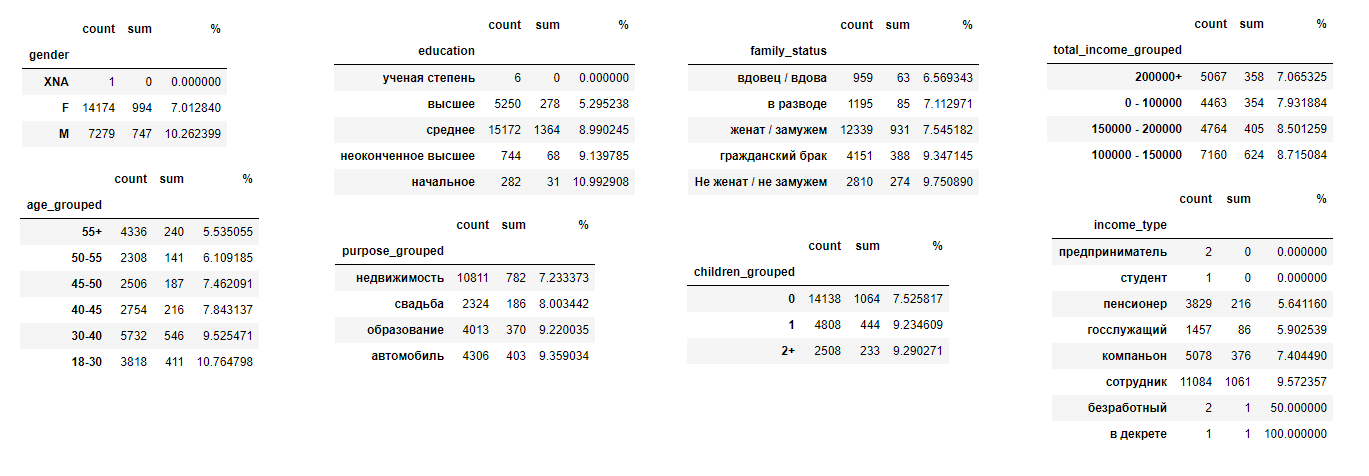

In [29]:
display(Image(filename='results.png', embed=True))

В ходе исследования надёжности заемщиков были изучены полученные данные, обработаны и заполнены пропуски, удалены дубликаты и клиенты были объединены в группы по разным параметрам. По итогам проделанной работы можно сделать следующие выводы: 

Портрет клиента с наименьшим риском возникновения долга: Женщина с высшим образованием, возрастом от 45ти лет.

В целом, женщины реже допускают задержки в платежах по кредиту, % должников держится на уровне 7% (на 1.1% ниже среднего по всей базе), у мужчин % должников составляет 10.25% (на 2.15% выше среднего по всей базе). Если у женщины в добавок есть высшее образование, вне зависимости от семейного положения % должников по такой группе составляет 5.2% (на 2.9% ниже среднего по всей базе). Близкий показатель у клинетов с высшим образованием вне зависимости от пола: 5.3%. Процентное соотношение должников также сокращается по мере увеличения возраста клиента: наилучший показатель у клиентов старше 55 лет (5.5%) и составляют они 20% от всей базы. Наилучшие группы по типу занятости это пенсионеры и госслужащие, должники занимают 5.7% от всей группы. У группы клиентов без детей % должников на 0.6% ниже, чем средний показатель по всей базе и на 1.75% ниже, чем у клиентов с детьми. У группы клиентов, которые находятся или когда-либо находились в браке % должников на 0.7% ниже, чем средний показатель по всей базе и на 2.1% ниже, чем у людей никогда не состоявших в официальном браке.
У групп клиентов, целью кредита у которых является автомобиль и образование: 9.3% должников (на 1.2% выше среднего).